In [ ]:
# import all libraries first

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline




The first step is to read import data files. we also transpose the data and drop the unneccesary data labels

In [19]:
# loading dataset into Pandas DataFrame
df = pd.read_csv("66 samples with descriptions.csv")
#                 , names=['Protein'+str(i) for i in range(0,3139)])
number_of_rows = (len(df.index))
df_transposed = df.T
df_transposed.columns = ['Protein'+str(i) for i in range(0,number_of_rows)]
df_trimmed = df_transposed.drop(df_transposed.index[0:6])
#df_trimmed.columns = df_trimmed.iloc[0]



df_trimmed.head()

       

,Protein0,Protein1,Protein2,Protein3,Protein4,Protein5,Protein6,Protein7,Protein8,Protein9,...,Protein3788,Protein3789,Protein3790,Protein3791,Protein3792,Protein3793,Protein3794,Protein3795,Protein3796,Protein3797
1A,11698.4,100.074,85.1451,NaN,426.253,1928.44,1904.43,597.173,729.492,624.62,...,437.931,162.253,387.87,201.289,131.856,122.653,NaN,1267.32,992.701,48.9808
1B,10974.6,93.7939,41.4828,NaN,419.749,1799.67,1904.21,456.066,556.505,608.725,...,439.608,166.378,425.401,214.421,119.345,137.784,NaN,1260.26,931.709,60.9928
1C,10148.5,94.1777,48.6932,NaN,406.196,2026.03,1845.66,423.775,583.931,630.61,...,448.454,158.098,404.322,219.409,115.66,145.147,NaN,1083.27,874.489,50.223
1D,11763.7,83.6524,39.1103,87.9865,419.269,1765.46,1749.11,469.337,480.925,623.57,...,433.479,177.191,386.602,217.806,121.119,139.151,58.2099,1193.05,944.724,71.4267
2A,7555.88,1663.45,1337.46,959.402,869.173,859.863,765.677,637.025,614.389,610.425,...,276.675,267.708,220.477,132.022,99.3414,79.0778,NaN,7376.88,1274.35,38.3897


eliminate nan values

In [20]:
df_trimmed.fillna('0',inplace=True)


In [21]:
#Next, let's create a DataFrame that will have the principal component values 

In [22]:
features = ['Protein'+str(i) for i in range(0,number_of_rows)]
x = df_trimmed.loc[:, features].values

scale the data to average 1, save and re-add the data labels

In [23]:
#y = df_trimmed.loc[:,['Protein0']].values

x = StandardScaler().fit_transform(x)

indexNamesArr = df_trimmed.index.values
listOfRowIndexLabels = list(indexNamesArr)

scaled = pd.DataFrame(data = x, columns = features, index = listOfRowIndexLabels)

we need to transpose the data back again to allow the grouping step to work

In [24]:
#pull out the pathway descriptions for each protein
categories = pd.read_csv("66 samples with descriptions.csv", usecols=[1])
categories = categories.T
categories.columns = ['Protein'+str(i) for i in range(0,number_of_rows)]
categories = pd.DataFrame(data = categories, columns = features)

#now we concat the labels and the scaled data and transpose it 
df_wcats = pd.concat([categories, scaled], axis=0, ignore_index=False)
df_wcats = df_wcats.T
df_wcats.head()

#df_wcats.columns = df_wcats.iloc[1]
#df_wcats = df_wcats.drop('metab_func',axis=1)
#grouped = df_wcats.groupby('metab_func')


#grouped.head()

,metab_func,1A,1B,1C,1D,2A,2B,2C,2D,3A,...,15A,15B,15C,15D,16A,16B,16C,16D,17A,17B
Protein0,ABC transporters,-0.0772253,-0.242859,-0.431902,-0.0622821,-1.02519,-1.25213,-0.989594,-1.28459,-0.118142,...,1.94447,0.965364,-0.366386,-0.554073,0.505032,1.81577,2.15805,-0.020519,-0.84949,0.100743
Protein1,Hypothetical,-0.455686,-0.468946,-0.468136,-0.49036,2.8453,2.57996,2.09709,2.60973,-0.537622,...,-0.666987,-0.498331,-0.490506,-0.507531,-0.46208,-0.474655,-0.543005,-0.481827,2.32705,-0.365724
Protein2,Others,-0.475458,-0.592273,-0.572982,-0.59862,2.875,3.49918,2.84656,3.26136,-0.557285,...,-0.429797,-0.46324,-0.449051,-0.415698,-0.488907,-0.463107,-0.392804,-0.45332,2.91377,-0.495378
Protein3,misc,-0.558896,-0.558896,-0.558896,-0.270332,2.58759,2.74908,1.97103,2.74478,-0.558896,...,-0.558896,-0.558896,-0.384954,-0.558896,-0.368179,-0.396437,-0.558896,-0.558896,1.97266,-0.558896
Protein4,"Valine, leucine and isoleucine biosynthesis",-1.52947,-1.56201,-1.62981,-1.56441,0.686345,0.146219,0.825306,0.483129,-1.61411,...,-1.62651,-1.42158,-0.541948,0.464348,0.206247,0.1486,-0.121418,0.556299,1.71274,-0.760318


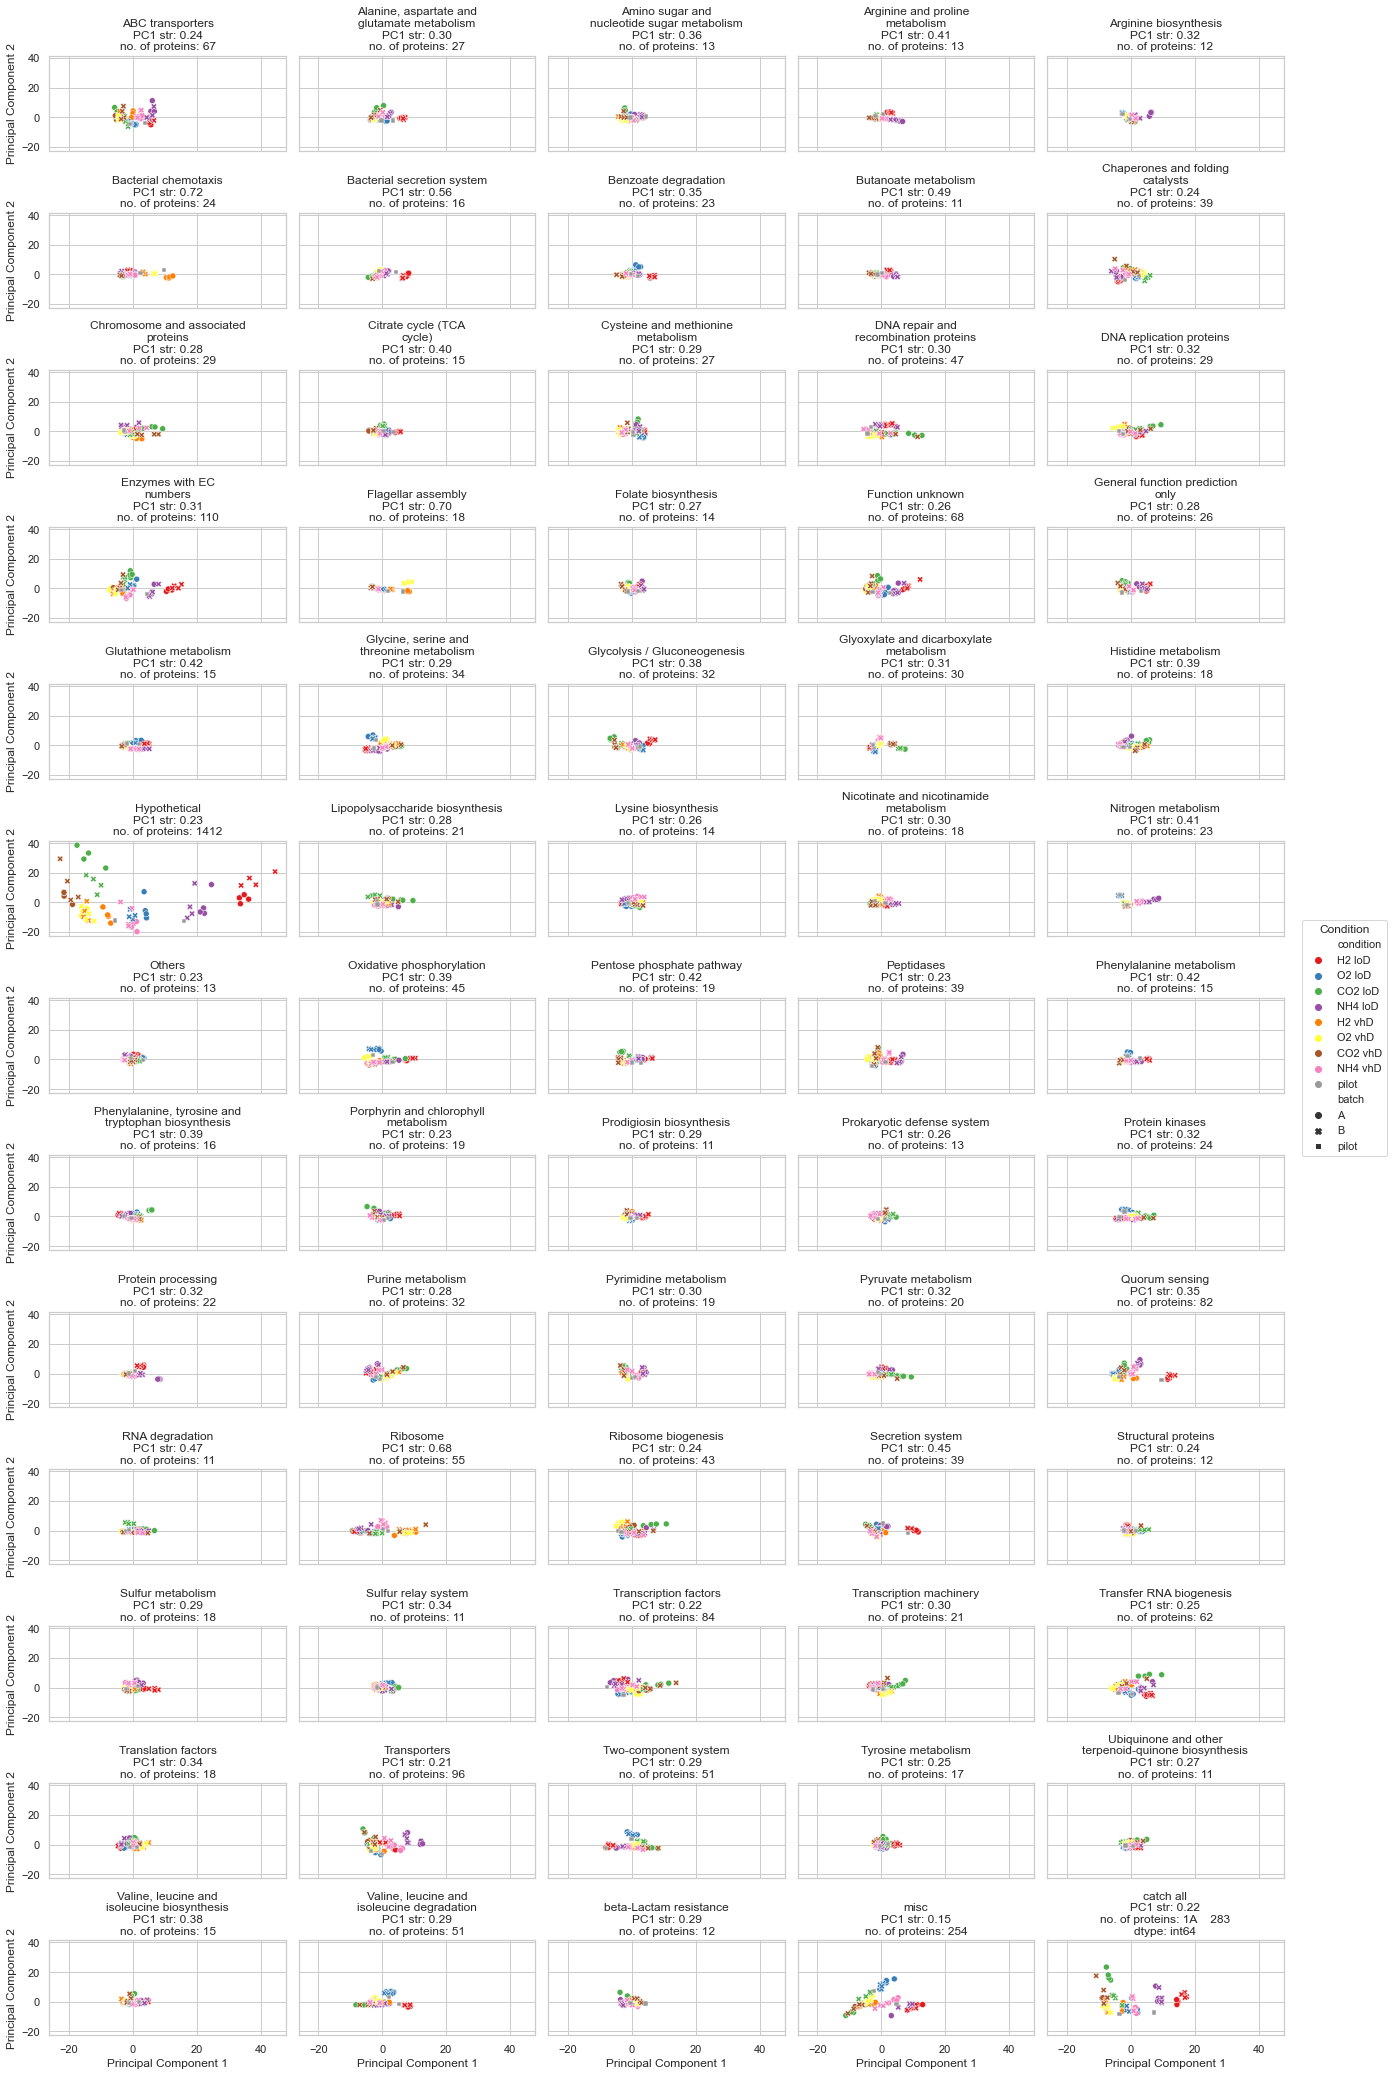

In [55]:
fig, axes = plt.subplots(nrows=13, ncols=5, figsize=(18, 29), sharex=True, sharey=True)
axes = axes.flatten()

#axim is the axis number the plot will be assigned
axim = -1
legend_handles = []
legend_labels = []
#create an empty dataframe to concat the small groups (pathways of <10 proteins) to.
small_groups_df = pd.DataFrame()

#here we group the data based on their labelled broad categories of metabolic function. This can be adjusted to group on other factors later, eg chromosome/plasmid of origin.
grouped = df_wcats.groupby('metab_func')

for i, group in grouped:
    group = group.drop('metab_func', axis = 1)
    
    number_samples = group.count()
    number_samples = number_samples.nlargest(1)

    #we are here only looking at PCAs for metabolic functions that have more than 10 associated proteins. The others can be grouped seperately
    if number_samples[0] > 10:
        no_proteins = number_samples[0]
        trans = group.T
        trans = StandardScaler().fit_transform(trans)
        axim = axim +1

        indexNamesArr = df_trimmed.index.values
        listOfRowIndexLabels = list(indexNamesArr)
        pca = PCA(n_components=2)
    
        principalComponents = pca.fit_transform(trans)
    

        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index = listOfRowIndexLabels)
                
        #lets get reactor run labels so we can label our data points based on their condition
        #first we add a new variable to the df "reactor run" its going to be the number associated with the sumple
        principalDf['Reactor_run'] = principalDf.index
        principalDf['Reactor_run']=principalDf['Reactor_run'].map(lambda x: x.rstrip('aAbBcCdD'))
        principalDf['Reactor_run']=principalDf['Reactor_run'].astype(int)
        
        #now we interpret that run number as a reactor condition. this obviously has to be manually changed when adding new runs to this analysis
        principalDf['condition'] = principalDf['Reactor_run'].map({
            1: "H2 loD",
            2: "O2 loD",
            3: "CO2 loD",
            4: "NH4 loD",
            5: "H2 vhD",
            6: "O2 vhD",
            7: "CO2 vhD",
            8: "NH4 vhD",
            9:"H2 loD",
            10: "O2 loD",
            11: "CO2 loD",
            12: "NH4 loD",
            13: "H2 vhD",
            14: "O2 vhD",
            15: "CO2 vhD",
            16: "NH4 vhD",
            17: "pilot"
    
    
    
        })
        #and now a batch indicating which biological replicate the sample belopngs to
        principalDf['batch'] = principalDf['Reactor_run'].map({
            1: "A",
            2: "A",
            3: "A",
            4: "A",
            5: "A",
            6: "A",
            7: "A",
            8: "A",
            9:"B",
            10: "B",
            11: "B",
            12: "B",
            13: "B",
            14: "B",
            15: "B",
            16: "B",
            17: "pilot"
    
    
    
        })
        

        custom_palette = sns.color_palette('Set1', n_colors=len(principalDf['condition'].unique()))
        scatter = sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', ax=axes[axim], hue='condition', style='batch', palette=custom_palette)
        
        #this variance value, included in the fig titles, shows the strength of PC1, 
        #it effectively shows how strongly correlated the variance in the data is
        variance=(pca.explained_variance_ratio_)[0]
        
        #this splits the title text after every 3rd word to avoid overlap. i here is the metab_func
        
        title_words = i.split()
        title_lines = [' '.join(title_words[i:i+3]) for i in range(0, len(title_words), 3)]
        axes[axim].set_title(('\n'.join(title_lines))+'\n'+"PC1 str: "+(str(variance))[0:4]+'\n'+"no. of proteins: "+(str(no_proteins)))
        
        axes[axim].set_xlabel('Principal Component 1')
        axes[axim].set_ylabel('Principal Component 2')
        
    #if statement is negative meaning the category had less than 10 proteins in it, so we want a "catch all" group for them
    else:
        small_groups_df = pd.concat([small_groups_df, group])

#now all the groups have been cycled through we need to plot the catch all group

    
no_proteins = small_groups_df.count()
no_proteins = no_proteins.nlargest(1)

trans = small_groups_df.T
trans = StandardScaler().fit_transform(trans)
axim = axim +1

indexNamesArr = df_trimmed.index.values
listOfRowIndexLabels = list(indexNamesArr)
pca = PCA(n_components=2)
    
principalComponents = pca.fit_transform(trans)
    

principalDf = pd.DataFrame(data = principalComponents
    , columns = ['principal component 1', 'principal component 2'], index = listOfRowIndexLabels)
                
        #lets get reactor run labels so we can label our data points based on their condition
        #first we add a new variable to the df "reactor run" its going to be the number associated with the sumple
principalDf['Reactor_run'] = principalDf.index
principalDf['Reactor_run']=principalDf['Reactor_run'].map(lambda x: x.rstrip('aAbBcCdD'))
principalDf['Reactor_run']=principalDf['Reactor_run'].astype(int)
        
        #now we interpret that run number as a reactor condition. this obviously has to be manually changed when adding new runs to this analysis
principalDf['condition'] = principalDf['Reactor_run'].map({
    1: "H2 loD",
    2: "O2 loD",
    3: "CO2 loD",
    4: "NH4 loD",
    5: "H2 vhD",
    6: "O2 vhD",
    7: "CO2 vhD",
    8: "NH4 vhD",
    9:"H2 loD",
    10: "O2 loD",
    11: "CO2 loD",
    12: "NH4 loD",
    13: "H2 vhD",
    14: "O2 vhD",
    15: "CO2 vhD",
    16: "NH4 vhD",
    17: "pilot"
    
    
    
})
        #and now a batch indicating which biological replicate the sample belopngs to
principalDf['batch'] = principalDf['Reactor_run'].map({
    1: "A",
    2: "A",
    3: "A",
    4: "A",
    5: "A",
    6: "A",
    7: "A",
    8: "A",
    9:"B",
    10: "B",
    11: "B",
    12: "B",
    13: "B",
    14: "B",
    15: "B",
    16: "B",
    17: "pilot"
  
})
        

custom_palette = sns.color_palette('Set1', n_colors=len(principalDf['condition'].unique()))
scatter = sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', ax=axes[axim], hue='condition', style='batch', palette=custom_palette)
        
        #this variance value, included in the fig titles, shows the strength of PC1, 
        #it effectively shows how strongly correlated the variance in the data is
variance=(pca.explained_variance_ratio_)[0]
        
        #this splits the title text after every 3rd word to avoid overlap. i here is the metab_func
        

axes[axim].set_title(("catch all")+'\n'+"PC1 str: "+(str(variance))[0:4]+'\n'+"no. of proteins: "+(str(no_proteins)))
        
axes[axim].set_xlabel('Principal Component 1')
axes[axim].set_ylabel('Principal Component 2')
            
    
    
    
#create an overall legend based only on last processed subgroup
handles, labels = scatter.get_legend_handles_labels()        
legend_handles.extend(handles)
legend_labels.extend(labels)        
fig.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Condition')

#hide individual subplot legends so we only have one overall legend
for ax in axes:
    ax.legend().set_visible(False)

#increasing the headspace to avoid overlap again
plt.subplots_adjust(hspace=0.9) 
plt.savefig('output_figure.png', bbox_inches='tight')

plt.tight_layout()
plt.show()     


In [56]:
no_proteins

1A    283
dtype: int64

In [28]:

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'], index = listOfRowIndexLabels)

finalDf=principalDf

#lets get reactor run labels so we can group our data points
finalDf['Reactor_run'] = finalDf.index

finalDf['Reactor_run']=finalDf['Reactor_run'].map(lambda x: x.rstrip('aAbBcCdD'))
finalDf['Reactor_run']=finalDf['Reactor_run'].astype(int)
finalDf['condition'] = finalDf['Reactor_run'].map({
    1: "H2 loD",
    2: "O2 loD",
    3: "CO2 loD",
    4: "NH4 loD",
    5: "H2 vhD",
    6: "O2 vhD",
    7: "CO2 vhD",
    8: "NH4 vhD",
    9:"H2 loD",
    10: "O2 loD",
    11: "CO2 loD",
    12: "NH4 loD",
    13: "H2 vhD",
    14: "O2 vhD",
    15: "CO2 vhD",
    16: "NH4 vhD",
    17: "pilot"
    
    
    
})
finalDf['batch'] = finalDf['Reactor_run'].map({
    1: "A",
    2: "A",
    3: "A",
    4: "A",
    5: "A",
    6: "A",
    7: "A",
    8: "A",
    9:"B",
    10: "B",
    11: "B",
    12: "B",
    13: "B",
    14: "B",
    15: "B",
    16: "B",
    17: "pilot"
    
    
    
})
#unique_runs=list(Reactor_run)

finalDf



,principal component 1,principal component 2,principal component 3,principal component 4,Reactor_run,condition,batch
1A,56.770111,-1.000656,3.793110,-26.708592,1,H2 loD,A
1B,54.305128,0.158005,3.766559,-27.358273,1,H2 loD,A
1C,54.955043,-6.408451,4.011048,-27.951552,1,H2 loD,A
1D,55.245847,3.178458,4.808224,-26.372072,1,H2 loD,A
2A,5.877289,-11.187656,47.732777,18.860724,2,O2 loD,A
...,...,...,...,...,...,...,...
16B,-0.979444,1.948704,-24.531329,11.946458,16,NH4 vhD,B
16C,-3.411514,9.772358,-25.212554,12.995837,16,NH4 vhD,B
16D,-1.014123,-23.836934,-20.439440,4.409940,16,NH4 vhD,B
17A,-10.455864,-24.258358,26.102310,3.790800,17,pilot,pilot


In [135]:
finalDf=principalDf

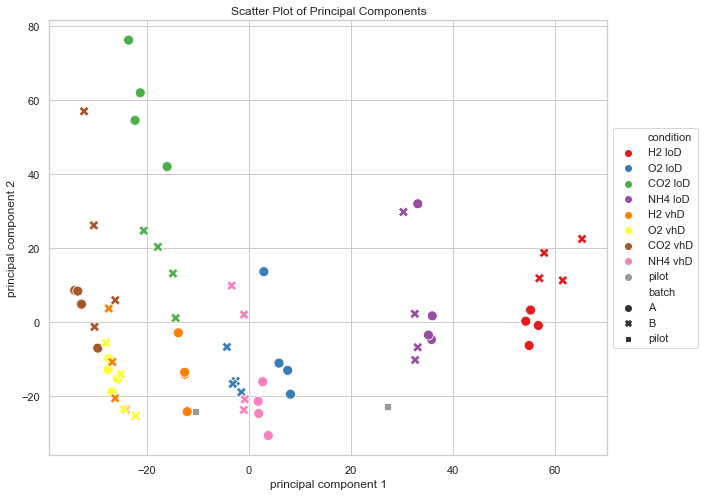

In [29]:

# Set the style for seaborn
sns.set(style="whitegrid")

custom_palette = sns.color_palette('Set1', n_colors=len(finalDf['condition'].unique()))

# Create a scatter plot with different colors for each Reactor_run
plt.figure(figsize=(10, 8))
sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='condition', style='batch', palette=custom_palette, s=100)
# Move the legend to the right outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Show the plot
plt.title('Scatter Plot of Principal Components')
plt.show()

In [30]:
pca.explained_variance_ratio_

array([0.22609251, 0.1345516 , 0.11096258, 0.07771608])

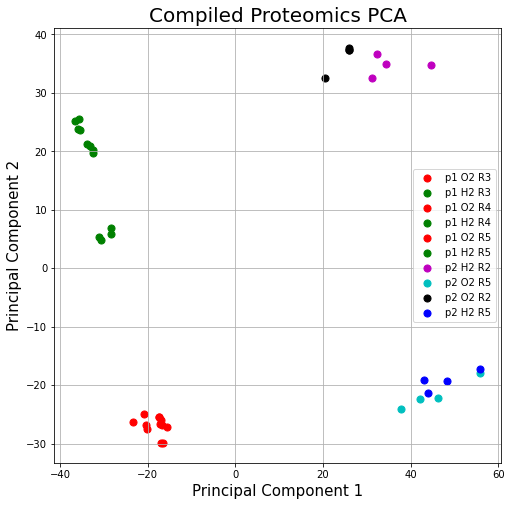

In [67]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Compiled Proteomics PCA', fontsize = 20)


Protein0 = ['p1 O2 R3', 'p1 H2 R3', 'p1 O2 R4', 'p1 H2 R4', 'p1 O2 R5', 'p1 H2 R5', 'p2 H2 R2', 'p2 O2 R5', 'p2 O2 R2', 'p2 H2 R5']
colors = ['r', 'g', 'r' , 'g', 'r', 'g', 'm', 'c', 'k', 'b']
for Protein0, color in zip(Protein0,colors):
    indicesToKeep = finalDf['Protein0'] == Protein0
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['p1 O2 R3', 'p1 H2 R3', 'p1 O2 R4', 'p1 H2 R4', 'p1 O2 R5', 'p1 H2 R5', 'p2 H2 R2', 'p2 O2 R5', 'p2 O2 R2', 'p2 H2 R5'], loc ='right')
ax.grid()



In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Proteomics 2 PCA', fontsize = 20)


Sample = finalDf.index
cmap = plt.get_cmap('hsv', len(unique_runs))
for i, Reactor_run in enumerate(unique_runs):
    indicesToKeep = finalDf['Reactor_run'] == Reactor_run
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , label=Reactor_run
               , color = cmap(i)
               , s = 50)

legend_handles = []
for i, Reactor_run in enumerate(unique_runs):
    legend_handles.append(ax.scatter([], [], color=cmap(i), label=Reactor_run, s=50))
ax.legend(handles=legend_handles, loc ='right')
ax.grid()
